In [1]:
!git clone https://huggingface.co/datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification
!git clone https://github.com/angiegh2002/nlp_hw

Cloning into 'Arabic_Dialect_Identification'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33 (from 1)
Unpacking objects: 100% (33/33), 6.47 KiB | 287.00 KiB/s, done.
Cloning into 'nlp_hw'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 251 (delta 57), reused 5 (delta 5), pack-reused 160 (from 1)
Receiving objects: 100% (251/251), 17.71 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
!pip install python-bidi
!pip install arabic_reshaper
!pip install gensim
!pip install fasttext
!pip install wordcloud
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296230 sha256=ceafc28efa8317735c57ba9c91585c880622a625335a97d0f625ee8e0382742f
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


#[إنجي غبيس - دانا كلش ]

<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries

In [3]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud
import regex,re
import os
import json
import nltk
from nltk.tokenize import  wordpunct_tokenize
from nltk import FreqDist, bigrams, trigrams
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from bidi.algorithm import get_display
import arabic_reshaper
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import fasttext
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score, balanced_accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input,Dense,Dropout,Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras import models
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Load data

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:

قم بوضع الخلايا الأربع التالية لحل كل طلب</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here


In [33]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# مهمة 01  : تحميل البيانات

## [1.1]

الكود التالي يقوم بقراءة جميع ملفات داتا مدار ويخزنها داخل داتا فريم
ثم يتحقق من وجود اسطر مكررة او تحوي خلايا فارغة  


In [21]:
MADAR_dir="/content/nlp_hw/MADAR_Corpus"
# MADAR_dir="MADAR_Corpus"
MADAR_file_path=[os.path.join(MADAR_dir,filename) for filename in os.listdir(MADAR_dir) if filename.endswith(".tsv")]
df = [pd.read_csv(Mfilepath, sep='\t') for Mfilepath in MADAR_file_path ]
MADAR_df=pd.concat(df)
MADAR_df=MADAR_df.drop_duplicates().dropna()
has_nan=MADAR_df.isnull().sum().any()

In [22]:
MADAR_trian_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-train'] ,MADAR_df[MADAR_df['split'] == 'corpus-6-train']])
MADAR_vaild_df=pd.concat([MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-dev'],MADAR_df[MADAR_df['split'] == 'corpus-6-dev']])
MADAR_test_df= MADAR_df[MADAR_df['split'] == 'corpus-6-test-corpus-26-test']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(MADAR_df),len(MADAR_trian_df),len(MADAR_vaild_df),len(MADAR_test_df)))

number of samples : 112000 
number of trian samples : 95600 
number of vaild samples : 11200
number of test samples :5200


In [23]:
MADAR_df.head(10)

,sentID.BTEC,split,lang,sent
0,5,corpus-6-test-corpus-26-train,DAM,موجود هنيك، قدام مكتب معلومات السياح بالزبط.
1,9,corpus-6-test-corpus-26-train,DAM,ما سمعت بهيك عنوان هون من قبل.
2,11,corpus-6-test-corpus-26-train,DAM,إمشي مباشرة لحد ما تشوف صيدلية.
3,26,corpus-6-test-corpus-26-train,DAM,بأديش الفطور؟
4,27,corpus-6-test-corpus-26-train,DAM,كيف فيني ساعدك؟
5,30,corpus-6-test-corpus-26-train,DAM,لف عالشمال بالدخلة التالتة.
6,50,corpus-6-test-corpus-26-train,DAM,بتحب كريما وسكر مع القهوة؟
7,64,corpus-6-test-corpus-26-train,DAM,ممكن تصرفلي هاد الشيك بقيمة ميتين دولار؟
8,74,corpus-6-test-corpus-26-train,DAM,إذا بين، اتصل فيني رجاءً.
9,86,corpus-6-test-corpus-26-train,DAM,وين القهوة؟


In [24]:
QADI_dir="/content/Arabic_Dialect_Identification/data"
# QADI_dir="Arabic_Dialect_Identification/data"
file_labels = [ "valid","test","trian"]
QADI_file_path=[os.path.join(QADI_dir,filename) for filename in os.listdir(QADI_dir)]
frames = [pd.read_parquet(Qfilepath).assign(split=label) for Qfilepath, label in zip(QADI_file_path, file_labels)]
QADI_df=pd.concat(frames)
label_mapping = {
    0: 'OM', 1: 'SD', 2: 'SA', 3: 'KW', 4: 'QA', 5: 'LB',
    6: 'JO', 7: 'SY', 8: 'IQ', 9: 'MA', 10: 'EG',
    11: 'PL', 12: 'YE', 13: 'BH', 14: 'DZ', 15: 'AE',
    16: 'TN', 17: 'LY'
}
QADI_df['label'] = QADI_df['label'].map(label_mapping)
QADI_df=QADI_df.drop_duplicates().dropna()
has_nan=QADI_df.isnull().sum().any()

In [25]:
QADI_trian_df=QADI_df[QADI_df['split'] == 'trian']
QADI_test_df=QADI_df[QADI_df['split'] == 'test']
QADI_vaild_df=QADI_df[QADI_df['split'] == 'valid']
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(QADI_df),len(QADI_trian_df),len(QADI_vaild_df),len(QADI_test_df)))

number of samples : 458197 
number of trian samples : 440052 
number of vaild samples : 9164
number of test samples :8981


In [26]:
QADI_df.head(10)

,id,label,text,split
0,910595516496515200,KW,@A_E_92 استاذ عبدالعزيز صارله الموضوع سنه يعن...,valid
1,847921262752129024,JO,#كذبة_نيسان كل عام والكذاب بألف خير 🙈😂 https:/...,valid
2,1138977052055560192,EG,@basitooo5 طمطم عاااتى طبق جبنة 🙄,valid
3,978901748604645376,AE,@alsyasiyeh @alsyaaf يمكن متلاحقين السوق بيشتر...,valid
4,838068478179430400,KW,@A_A_AlTammar عيل المدرب حمار حشاك .. مالها حل...,valid
5,1180570878192562176,DZ,@X_NISOU @ALGtrend @bina_bilaa @Ss68Sarah @Ena...,valid
6,1125837506077970432,BH,الهُم انك عفو كريم تُحب العفو فأعفُ عنا ..,valid
7,1133104152131694592,JO,@emsamiira الحلو بكل الي بصير معك من مصايب لس...,valid
8,1107380111664398336,LB,هذا ما قالته كلودين عون عن صحّة الرئيس https:/...,valid
9,1153151641333509888,LB,@AZAL84 @BassamAbouZeid @MokhtarGhazzawi هي شب...,valid


## [1.2]

In [27]:
class_criteria_df=pd.read_csv("/content/nlp_hw/dialect_name_unification.csv")
# class_criteria_df=pd.read_csv("dialect_name_unification.csv")
class_criteria_df = class_criteria_df.drop(labels = ["Unnamed: 0"], axis = 1)
class_criteria_df=class_criteria_df.drop(index=[0,1],axis=0)
class_criteria_df.head()

,Region,Unnamed: 2,Unnamed: 3,Country,Unnamed: 5,Unnamed: 6,City,Unnamed: 8
2,Maghreb,المغاربية,MA,Morocco,المغرب,RAB,Rabat,الرباط
3,Maghreb,المغاربية,MA,Morocco,المغرب,FES,Fes,فاس
4,Maghreb,المغاربية,DZ,Algeria,الجزائر,ALG,Algiers,الجزائر
5,Maghreb,المغاربية,DZ,Algeria,الجزائر,ANB,Annaba,عنابة
6,Maghreb,المغاربية,TN,Tunisia,تونس,TUN,Tunis,تونس


In [28]:
MADAR_df_merged=MADAR_df.merge(class_criteria_df,left_on="lang",right_on="Unnamed: 6",how="left")
MADAR_df_merged = MADAR_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City"], axis = 1)
MADAR_df_merged.rename(columns={"Unnamed: 5" :"Country","Unnamed: 8" :"City","Unnamed: 2" :"Region"},inplace=True)
MADAR_df_merged=MADAR_df_merged.drop_duplicates().dropna()
has_nan=MADAR_df_merged.isna().any().any()
# MADAR_df_merged.to_csv("dd.csv",index=False)
print("number of samples :",len(MADAR_df_merged))
# MADAR_df_merged.head(10)

number of samples : 112000


In [29]:
QADI_df_merged=QADI_df.merge(class_criteria_df,left_on="label",right_on="Unnamed: 3",how="left")
QADI_df_merged = QADI_df_merged.drop(labels = ["Unnamed: 6","Unnamed: 3","Region","Country","City","Unnamed: 8"], axis = 1)
QADI_df_merged.rename(columns={"text" :"sent","Unnamed: 5" :"Country","Unnamed: 2" :"Region"},inplace=True)

QADI_df_merged=QADI_df_merged.drop_duplicates().dropna()
has_nan=QADI_df_merged.isna().any().any()
print("number of samples :",len(QADI_df_merged))
# QADI_df_merged.head(10)

number of samples : 458197


## [1.3]

In [30]:
excluded_columns = ['sentID.BTEC',"lang"]
excluded_columns1 = ['id','label']
MADAR_df_filtered = MADAR_df_merged.drop(columns=excluded_columns, errors='ignore')
QADI_df__filtered = QADI_df_merged.drop(columns=excluded_columns1, errors='ignore')
data_df = pd.concat([MADAR_df_filtered, QADI_df__filtered], ignore_index=True)

In [31]:
data_trian_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-train'] ,data_df[data_df['split'] == 'corpus-6-train'],data_df[data_df['split'] == 'trian']])
data_vaild_df=pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-dev'],data_df[data_df['split'] == 'corpus-6-dev'],data_df[data_df['split'] == 'valid']])
data_test_df= pd.concat([data_df[data_df['split'] == 'corpus-6-test-corpus-26-test'],data_df[data_df['split'] == 'test']])
print("number of samples : {} \nnumber of trian samples : {} \nnumber of vaild samples : {}\nnumber of test samples :{}".format(len(data_df),len(data_trian_df),len(data_vaild_df),len(data_test_df)))

number of samples : 570197 
number of trian samples : 535652 
number of vaild samples : 20364
number of test samples :14181


In [32]:
data_df.head(10)

,split,sent,Region,Country,City
0,corpus-6-test-corpus-26-train,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,الشامية,سوريا,دمشق
1,corpus-6-test-corpus-26-train,ما سمعت بهيك عنوان هون من قبل.,الشامية,سوريا,دمشق
2,corpus-6-test-corpus-26-train,إمشي مباشرة لحد ما تشوف صيدلية.,الشامية,سوريا,دمشق
3,corpus-6-test-corpus-26-train,بأديش الفطور؟,الشامية,سوريا,دمشق
4,corpus-6-test-corpus-26-train,كيف فيني ساعدك؟,الشامية,سوريا,دمشق
5,corpus-6-test-corpus-26-train,لف عالشمال بالدخلة التالتة.,الشامية,سوريا,دمشق
6,corpus-6-test-corpus-26-train,بتحب كريما وسكر مع القهوة؟,الشامية,سوريا,دمشق
7,corpus-6-test-corpus-26-train,ممكن تصرفلي هاد الشيك بقيمة ميتين دولار؟,الشامية,سوريا,دمشق
8,corpus-6-test-corpus-26-train,إذا بين، اتصل فيني رجاءً.,الشامية,سوريا,دمشق
9,corpus-6-test-corpus-26-train,وين القهوة؟,الشامية,سوريا,دمشق


# مهمة 02 : فهم وتحليل البيانات

EDA

## [2.1]


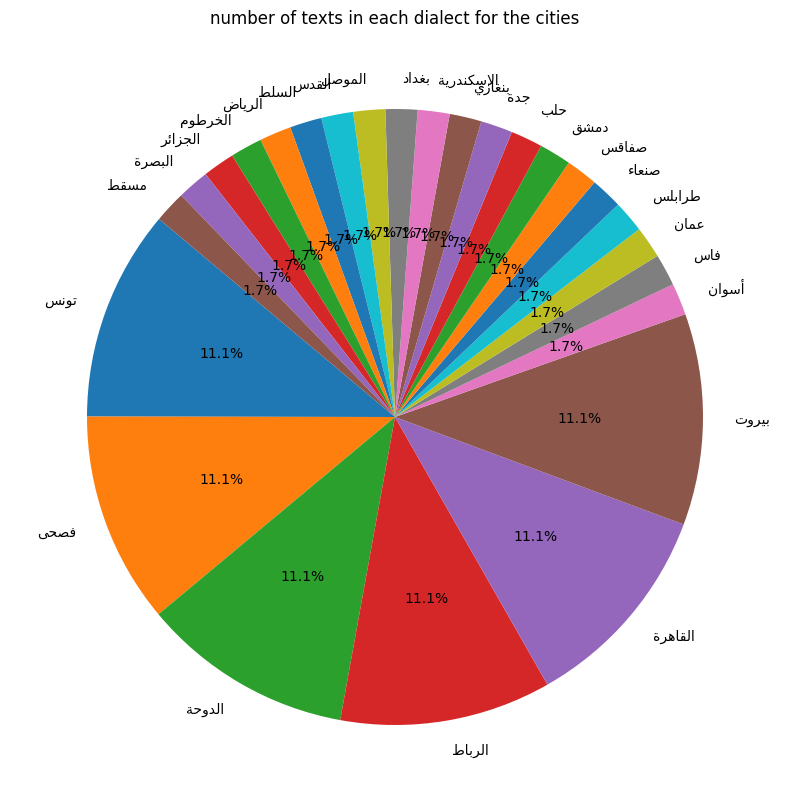

In [34]:
city_counts = data_trian_df.groupby('City')['sent'].count()
city_counts = city_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(city)) for city in city_counts.index]
plt.figure(figsize=(10, 10))
plt.pie(city_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the cities")
plt.show()

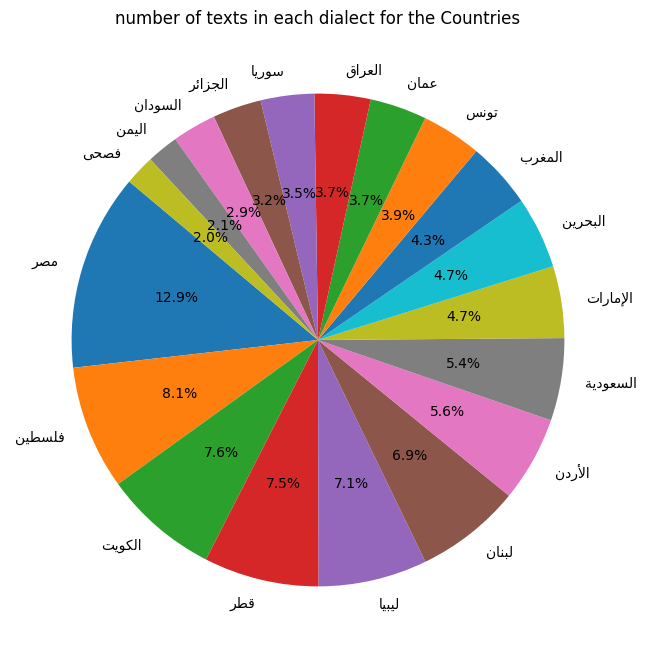

In [35]:
country_counts = data_trian_df.groupby('Country')['sent'].count()
country_counts = country_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(country)) for country in country_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Countries")
plt.show()

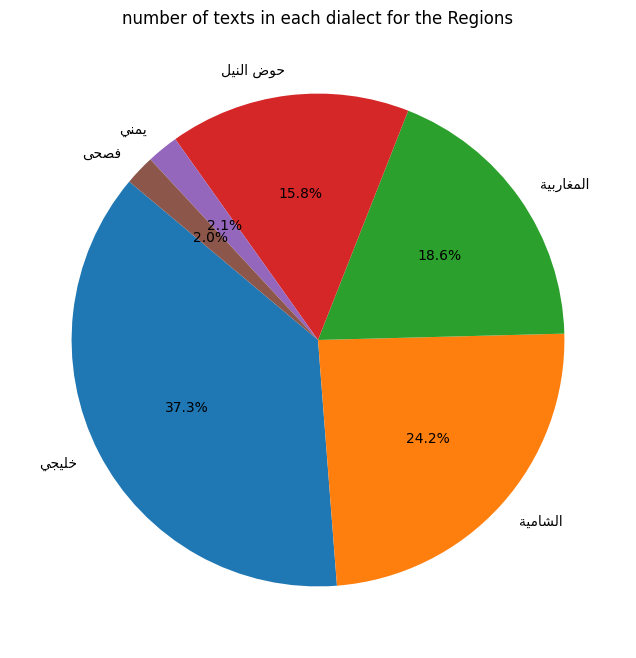

In [36]:
region_counts = data_trian_df.groupby('Region')['sent'].count()
region_counts = region_counts.sort_values(ascending=False)
reshaped_labels= [get_display(arabic_reshaper.reshape(region)) for region in region_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title("number of texts in each dialect for the Regions")
plt.show()

<div dir="rtl">
ملاحظات :<br>
حسب المناطق (regions):<br>
- المنطقة الخليجية (glof) تحتوي اكبر نسبة من النصوص في مجموعة البيانات 37.3% .<br>
-هناك نقص بالبيانات التي تمثل منطقة اليمني (yemen) في الداتا .<br>
-المنطقة المغربيّة ومنطقة حوض النيل لديها نسب متقاربة بعدد النصوص ضمن الداتا .<br>
حسب البلاد (countries):<br>
- بلد ليبيا هي الاكثر مساهمة بعدد النصوص ضمن المنطقة المغاربيية ،اما في منطقة حوض النيل فعد النصوص من بلد مصر هي الاكثر ،وفي المنطقة الشاميية تعد النصوص من اللبنان وفلسطين الاكثر عددا ،واخيرا في المنطقة الخليجية العدد الاكبر من النصوص يوجد في بلد الكويت وقطر .<br>
- بلد الجزائر وعمان يملكان عددا صغيرا من النصوص على الرغم من انتماءهم الى منطقتين بعدد نصوص كبير نسبيا .<br>
حسب المدن (cities) <br>
-النصوص ليست موزعة بالتساوي بين المدن حيث يوجد ٥ دول فقط بعدد نصوص اكبر اما بقية المدن فعدد النصوص فيها صغير .<br>
مما سبق وجدنا ان البيانات تظهر تركيزا في عدد قليل من المدن مما يشير الى توزع غير متساو .<br>
الاحظ ايضا ان البيانات في داتا مدار غير متوازنة فقد ظهر ذلك في تمثل عدد النصوص لكل مدينة بينما كان هناك توازن نوعا ما عند تمثيل عدد النصوص على  مستوى البلاد او المناطق حيث ان داتا كادي متوازنة نوعا ما لذلك عند جمعها مع داتا مدار نجد ان  نسبة عدد النصوص حسب البلدان او المناطق متوازنة الى حد ما حيث لا تسيطر منطقة او بلد على عدد كبير من النصوص مقارنة بالبلدان او المناطق الاخرى   <br>
</div>

## [2.2]

In [37]:
def tokenize(text):
    tokens = wordpunct_tokenize(text)
    # arabic_tokens = [token for token in tokens if regex.match(r"^\p{IsArabic}+$", token)]
    return tokens

data_trian_df['tokens'] = data_trian_df['sent'].apply(tokenize)

all_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))

print(f"عدد الكلمات الكلي (Total Tokens): {total_tokens}")
print(f"عدد الكلمات الفريدة (Vocab Tokens): {unique_tokens}")


عدد الكلمات الكلي (Total Tokens): 8466370
عدد الكلمات الفريدة (Vocab Tokens): 739865


In [38]:
data_trian_df.head()

,split,sent,Region,Country,City,tokens
0,corpus-6-test-corpus-26-train,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,الشامية,سوريا,دمشق,"[موجود, هنيك, ،, قدام, مكتب, معلومات, السياح, ..."
1,corpus-6-test-corpus-26-train,ما سمعت بهيك عنوان هون من قبل.,الشامية,سوريا,دمشق,"[ما, سمعت, بهيك, عنوان, هون, من, قبل, .]"
2,corpus-6-test-corpus-26-train,إمشي مباشرة لحد ما تشوف صيدلية.,الشامية,سوريا,دمشق,"[إمشي, مباشرة, لحد, ما, تشوف, صيدلية, .]"
3,corpus-6-test-corpus-26-train,بأديش الفطور؟,الشامية,سوريا,دمشق,"[بأديش, الفطور, ؟]"
4,corpus-6-test-corpus-26-train,كيف فيني ساعدك؟,الشامية,سوريا,دمشق,"[كيف, فيني, ساعدك, ؟]"


## [2.3]

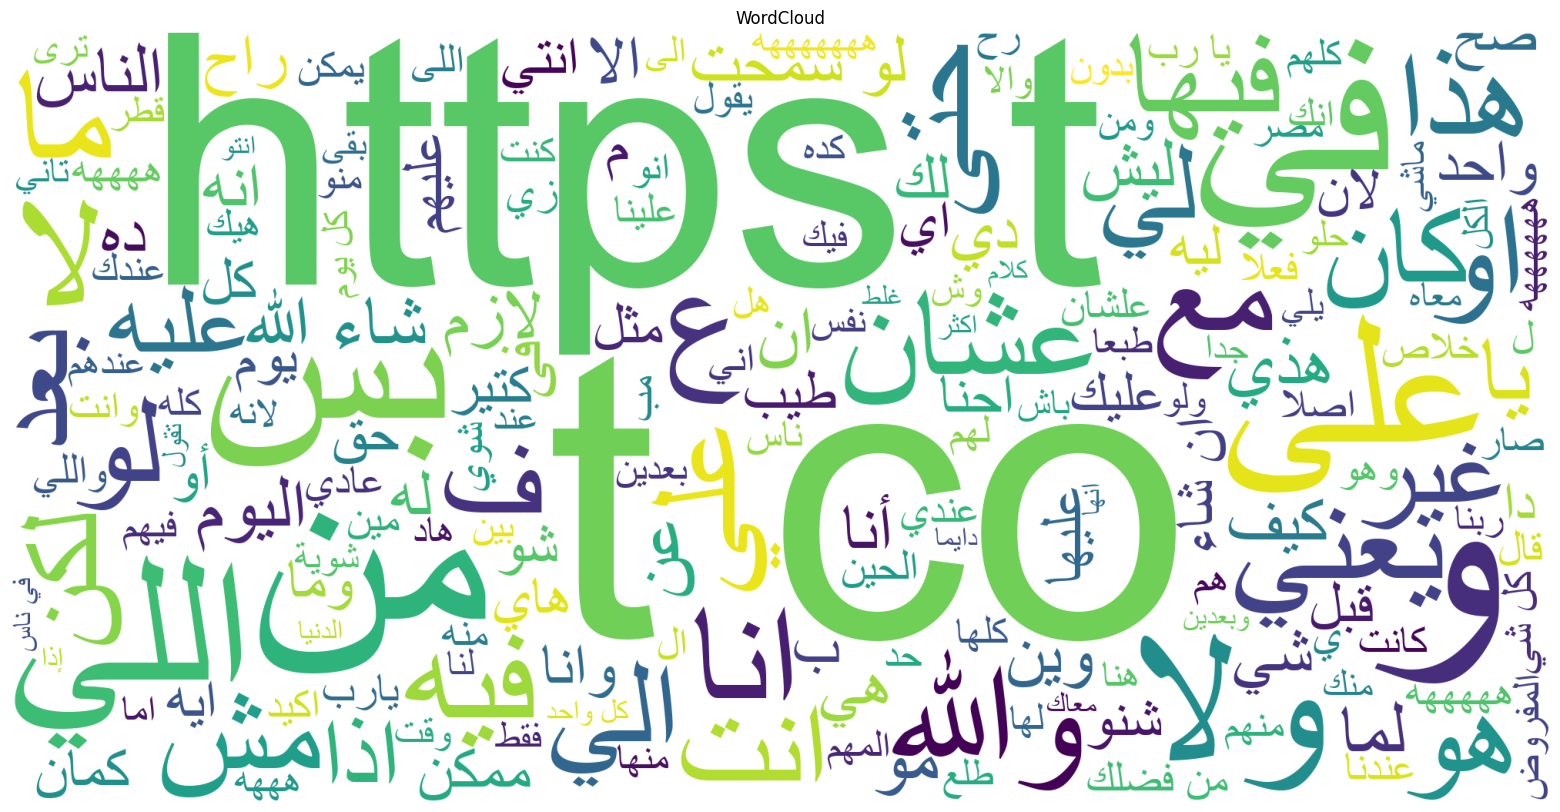

In [ ]:
arabic_tokens = []
other_tokens = []
def is_arabic(text):
    return regex.match(r"^\p{IsArabic}+$", text) is not None
for token in all_tokens:
    if is_arabic(token):
        arabic_tokens.append(token)
    else:
        other_tokens.append(token)

arabic_text = ' '.join(arabic_tokens)
reshaped_text = arabic_reshaper.reshape(arabic_text)
processed_arabic_text = get_display(reshaped_text)

final_text = processed_arabic_text + ' ' + ' '.join(other_tokens)

wordcloud = WordCloud(
    font_path='arial',
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000
).generate(final_text)

plt.figure(figsize=(20, 10))
plt.title("WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:

# plt.figure(figsize=(20, 10))
# plt.title("WordCloud")
# plt.imshow(wordcloud)
# plt.axis("off")
# wordcloud_path = "wordcloud_output1.png"  # اسم ملف الصورة
# plt.savefig(wordcloud_path, dpi=300, bbox_inches='tight')  # الحفظ بجودة عالية
# plt.show()
# print(f"تم حفظ الصورة في: {wordcloud_path}")


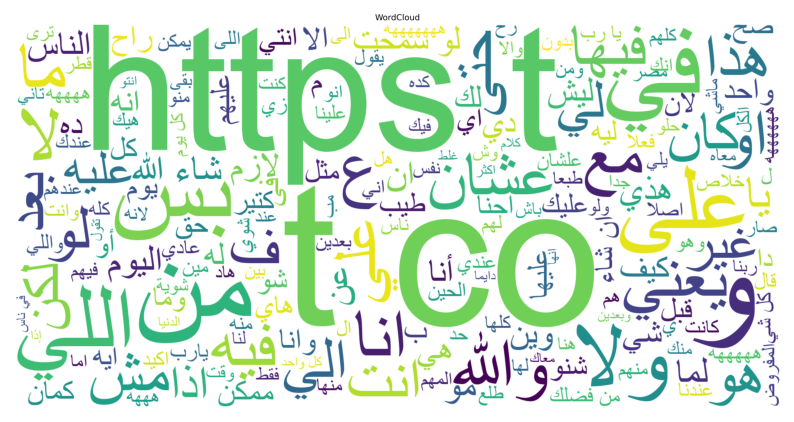

In [ ]:
img = plt.imread("wordcloud_output1.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # إزالة المحاور
plt.show()

بعد قراءة الرسم الناتج وجدنا ان الداتا تحوي على الكثير من الروابط حيث تحتل كلمة (https) الجزء الاكبر من الرسم .
كما ان هناك العديد من كلمات التوقف التي تشغل مساحة من الرسم وتتفاوت نسبة تتكرارها لذا من المهم اخذها في عين الاعتبار واختبار ان كانت ازالتها ستحسن من اداء النموزج ام لا .
كما نلاحظ ان سلسلة الحروف التي تعبر عن الضحك (ههههه) قد وردت أكثر من مرة داخل الرسم ايضا يمكن النظر في امكانية ازالتها مستقبلا  نرى انها قد لا تساعد في تحديد لهجة لبلد او منظقة معينة.

## [2.4]

In [39]:
def get_most_common_words(tokens, n=10):
    """Return the n most common words."""
    word_freq = FreqDist(tokens)
    return word_freq.most_common(n)

def get_hapaxes(tokens, n=10):
    """Return the first n hapaxes (words that appear only once)."""
    word_freq = FreqDist(tokens)
    hapaxes = [word for word in word_freq.hapaxes()]
    return hapaxes[:n]

def get_most_common_bigrams(tokens, n=10):
    """Return the n most common bigrams."""
    bigram_freq = FreqDist(bigrams(tokens))
    return bigram_freq.most_common(n)

def get_most_common_trigrams(tokens, n=10):
    """Return the n most common trigrams."""
    trigram_freq = FreqDist(trigrams(tokens))
    return trigram_freq.most_common(n)

def get_most_important_bigrams(tokens, n=10):
    """Return the n most important bigrams using PMI."""
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigram_finder.apply_freq_filter(2)
    return bigram_finder.nbest(BigramAssocMeasures().pmi, n)

def get_most_important_trigrams(tokens, n=10):
    """Return the n most important trigrams using PMI."""
    trigram_finder = TrigramCollocationFinder.from_words(tokens)
    trigram_finder.apply_freq_filter(2)
    return trigram_finder.nbest(TrigramAssocMeasures().pmi, n)


In [40]:
def analyze_texts(dataframe, column='City', n=10):
    """Analyze texts and print results for each city."""
    city_tokens = {}

    for index, row in dataframe.iterrows():
        label = row[column]
        tokens = row['tokens']
        if pd.isna(label):
            continue
        if label not in city_tokens:
            city_tokens[label] = []
        city_tokens[label].extend(tokens)


    for city, tokens in city_tokens.items():
        most_common = get_most_common_words(tokens, n)
        hapaxes = get_hapaxes(tokens, n)
        most_common_bigrams = get_most_common_bigrams(tokens, n)
        most_common_trigrams = get_most_common_trigrams(tokens, n)
        most_important_bigrams = get_most_important_bigrams(tokens, n)
        most_important_trigrams = get_most_important_trigrams(tokens, n)


        print(f"=== Results for {city} ===")
        print("Most Common Words: ", ', '.join([f"{word} ({count})" for word, count in most_common]))
        print("Hapaxes: ", ', '.join(hapaxes))
        print("Most Common Bigrams: ", ', '.join([f"{' '.join(bigram)} ({count})" for bigram, count in most_common_bigrams]))
        print("Most Common Trigrams: ", ', '.join([f"{' '.join(trigram)} ({count})" for trigram, count in most_common_trigrams]))
        print("Most Important Bigrams: ", ', '.join([' '.join(bigram) for bigram in most_important_bigrams]))
        print("Most Important Trigrams: ", ', '.join([' '.join(trigram) for trigram in most_important_trigrams]))
        print("=" * 50)


In [41]:
analyze_texts(data_trian_df)

=== Results for دمشق ===
Most Common Words:  . (1204), ؟ (675), ، (392), بدي (144), ممكن (134), من (124), سمحت (117), لو (113), على (103), هاد (102)
Hapaxes:  السياح, بالزبط, سمعت, بهيك, إمشي, تصرفلي, أطفال, وزيادة, بالظبط, للتوصيل
Most Common Bigrams:  لو سمحت (106), ، لو (94), سمحت . (88), . ممكن (76), . بدي (76), ؟ بدي (51), رجاء ً (48), . رح (47), . في (35), ؟ ممكن (34)
Most Common Trigrams:  ، لو سمحت (89), لو سمحت . (78), . رجاء ً (27), لو سمحت ؟ (23), . اي ، (19), . شكرا ً (15), من هون ؟ (15), . ممكن تعطيني (14), إذا بتريد . (13), ؟ رجاء ً (13)
Most Important Bigrams:  أكد رحلتي, أوتيلات رخيصة, الحي الصيني, بشتغل بشركة, تناولني الملح, حديقة الحيوانات, درج الكهربا, كريما وسكر, لاس فيغاس, لوس أنجلوس
Most Important Trigrams:  ارجع أكد رحلتي, عالشمال عند إشارة, عند إشارة المرور, تدفعلي شركة الطيران, تتبادل معي بالمقعد, الطرف التاني عالخط, عنوان الاتصال تبعك, سنة ألف وتسعمية, إيه بي سي, تعطيني جدول مواعيد
=== Results for القدس ===
Most Common Words:  . (1239), ؟ (680), ، (390), في (2

In [42]:
analyze_texts(data_trian_df,"Country")

=== Results for سوريا ===
Most Common Words:  @ (12966), . (6785), من (3428), / (2925), ما (2786), t (2771), :// (2769), co (2769), # (2275), بس (2077)
Hapaxes:  إمشي, واجه, الجمارك, للرجلين, العراض, الفردي, ضيق, تسخنه, برفيقي, مخصصة
Most Common Bigrams:  :// t (2769), t . (2769), . co (2769), co / (2769), https :// (1764), http :// (1005), ... http (473), ... https (361), . @ (259), @ hamodax (248)
Most Common Trigrams:  :// t . (2769), t . co (2769), . co / (2769), https :// t (1764), http :// t (1005), ... http :// (473), ... https :// (361), اعتقلوه العفاريت الزرق (183), ، إذا سمحت (146), # ياااحرية .. (140)
Most Important Bigrams:  Salah HA, Touch Bar, am sam, känner sig, last seen, sig älskad, اخـر مـره, ازرعوها بدقن, الإجراءات الرسمية, الاقيها جمبي
Most Important Trigrams:  känner sig älskad, العد التنازلي لنهاية, تكـون اخـر مـره, اشتروها وحطوا مصرياتها, بأهلها يكفيك شرها, بدلة غامقة لإلي, عطي هالشراب لابنك, وحطوا مصرياتها بجيبتهم, يوزك ويقلك كبوس, اصحى الاقيها جمبي
=== Results 

In [43]:
analyze_texts(data_trian_df,"Region")

=== Results for الشامية ===
Most Common Words:  @ (87043), . (41095), ما (26034), من (22288), / (16655), t (16159), :// (16144), co (16144), بس (15770), ، (15688)
Hapaxes:  للرجلين, برفيقي, اسآل, الكمالة, عالاجراءات, بمجلتنا, محار, طعمته, اتدور, اتنزل
Most Common Bigrams:  :// t (16144), t . (16144), . co (16144), co / (16144), https :// (14537), 😂 @ (2272), . @ (1951), http :// (1607), 😂😂 @ (1275), يا رب (1260)
Most Common Trigrams:  :// t . (16144), t . co (16144), . co / (16144), https :// t (14537), http :// t (1607), ... https :// (1023), ... http :// (665), ان شاء الله (611), ، لو سمحت (504), 😂 https :// (479)
Most Important Bigrams:  Baasha Tafasilak, Ca va, Fatma Amin, Hussein Shejaeya, ID 5192090817, Najwa Karam, Nizar Francis, Rand Moh, Touch Bar, Visca barca
Most Important Trigrams:  känner sig älskad, pa tu manaa, اقرابك ولحمك ودمك, بتاريخها ومعلقه بعنوانها, بثمامها معذبه بتاريخها, تكـون اخـر مـره, مراري وطفيها بدمعي, معذبه بتاريخها ومعلقه, ونسكي ومحياي ومماتي, ﺑﺪﻛﻢ ﺗﻨﺒﺴﻄﻮ 

لاحظنا انه بالنسبة للكلمات الاكثر تكرارا او الثنائسات والثلاثيات تظهر فيها علامات الترقيم وكلمات التوقف وبالاضافة للروابط والرموز اما بالنسبة للثننائيات والثلاثيات المهمة والاكثر تكرارا فاننا نلاحظ وجود  كلمات معبرة او مترابطة على عكس الثنائيات الاكثر تكرارا حيث يوجد كلمة مع فاصلة و رمز .

## [2.5]

In [44]:


def find_distinctive_words(dataframe, column='City', threshold=10):
    dialect_words = {}
    all_words = set()
    for index, row in dataframe.iterrows():
        dialect = row[column]
        if pd.isna(dialect):
            continue
        tokens = row['tokens']
        if dialect not in dialect_words:
            dialect_words[dialect] = Counter()
        dialect_words[dialect].update(tokens)
        all_words.update(tokens)
    distinctive_words = {
        dialect: {
            word: count
            for word, count in dialect_words[dialect].items()
            if count >= threshold and all(
                word not in dialect_words[other_dialect]
                for other_dialect in dialect_words if other_dialect != dialect
            )
        }
        for dialect in dialect_words
    }

    distinctive_words_sorted = {
        dialect: dict(sorted(words.items(), key=lambda x: x[1]))
        for dialect, words in distinctive_words.items()
    }

    for dialect, words in distinctive_words_sorted.items():
        print(f"\nالكلمات المميزة في لهجة {dialect}:")
        if words:
            print(', '.join([f"{word} ({count})" for word, count in words.items()]))
        else:
            print("لا توجد كلمات مميزة تتجاوز العتبة المحددة")

    return distinctive_words_sorted

In [45]:
c=find_distinctive_words(data_trian_df,"City",3)


الكلمات المميزة في لهجة دمشق:
بشان (3), شنتايت (3), اكتوب (3), ليكه (4), معناتها (6), هوة (25)

الكلمات المميزة في لهجة القدس:
جرزة (3), احداعش (3), تاعتك (3), لايمتا (3), أستئجر (3)

الكلمات المميزة في لهجة أسوان:
عايزنى (3), متكنش (3), متهيئلى (3), متعرفش (3), ينعل (3), تسعماية (3), إملى (3), جدآ (4), إنهاردة (5), هبقى (5), عندينا (6), آجر (7), متهيئلي (9)

الكلمات المميزة في لهجة الموصل:
تغيدني (3), عشغ (3), غجال (3), حواس (3), كبيغ (3), الجنطه (3), الظهغ (3), اشني (3), يطيق (3), صغيغي (3), اخذو (3), يصيغ (3), غاس (3), تشغب (3), الاحسنلك (3), لهل (3), وقعتو (3), للاعلى (3), اتغيد (3), هيانو (3), شهغ (3), معانه (3), ارسلو (3), بيغدي (3), وتسعمي (3), المسافه (3), عيلي (3), كبيغه (3), وخمسي (3), احبو (3), عدشوف (3), جيين (3), اللاخ (4), قغيبي (4), اغخص (4), صاغ (4), لليي (4), حاغه (4), نطيق (4), الامتعه (4), جنطه (4), بالثميني (4), عدما (4), حاغ (4), التغيوقه (5), الجويي (5), اقغب (5), نغوح (5), بريديي (5), عددوغ (5), كنتو (5), حولنه (5), طويلي (5), الطياغه (5), اكبغ (5), علينو (6), ع

In [46]:
co=find_distinctive_words(data_trian_df,"Country",10)


الكلمات المميزة في لهجة سوريا:
suaad_syr (10), لانو_ما_بعرف_شو_بدي (10), Shb34a (10), MTulimat (10), almadinafmsyria (10), ئلي_لا_تسرئها (10), mousa_m_agha (10), anasimam77 (10), Hiba_alshamsy (10), abah07 (10), HIBA_1984 (10), abojony89 (10), ssss0019871 (10), farahmaarouf3 (10), asseraaalsham (10), أنا_اليرموك (10), abdullahojd (10), شنتاية (11), secureuser1 (11), RubaSyrian (11), ramashahid0 (11), lama_khashi (11), يااااحرية (11), MustafaSejari (11), rosemar3ee (11), كورديللو (11), shaza_meh (11), SamoraBrd (11), kramgood (11), o0_0oShaamo0_0o (11), ramroom_homs (11), SanaTabbaa (11), SibaiAbdul (11), But_Not_Me (11), بالغوطة (11), doncattivo (11), AN_SYR (11), فنننننن (11), sma172 (12), 20_o_20_o (12), Darin_ALabdalla (12), sousoum (12), ئلك (12), mwlnecodqpmz (12), WoRoudsy (12), eje_bh (12), Fahaad__ksa (12), 92hasson (12), majed_abdalnoor (13), molhamteam (13), 1983 (13), Kalmuqdad (13), waad1370 (13), بدنا_ياهن_بدنا_الكل (13), janaalrifaey_ (13), naifshpoor2020 (13), ReemeAlna

In [47]:
re=find_distinctive_words(data_trian_df,"Region",20)


الكلمات المميزة في لهجة الشامية:
رفقاتي (20), عالدرج (20), شنطاتي (20), منحكي (20), ZooZGooV (20), الدركي (20), besobasil_go (20), SabbaghManar (20), MadridFatma (20), yousefmohabbash (20), ZAlomoush (20), MohammedEHamma1 (20), donahmad154 (20), ibcio (20), aboodkattan (20), starXsally (20), FadiAlMasri1 (20), wisso220 (20), Alaa_Abu_Hassan (20), nouar_sa (20), قول_شي_للسعد (20), dam3a999999 (20), Berry___H (20), osamayazori (20), RayaSeifan (20), sama_alshami22 (20), الكن (20), mloMie5RiDtcRdr (20), mokh199 (20), كبشة (20), wehby_Abeer (20), farahmohamad743 (20), FaridMy67 (20), moatazbasbuos (20), شواي (20), niBCS2KmY7 (20), Alaa_Qatawneh (20), amalAldoghmi (20), hallal__ (20), zeyad_alhassan (20), Hanadi75660899 (20), good222333 (20), DaniaFreind (20), عالمحطة (21), أمتين (21), بصيروا (21), SRAXfjKpW7 (21), OHMYJAD (21), سنابات_بلال_الماضي (21), Oks_657 (21), السيد_نصرالله_ثقتنا (21), engy_rashad (21), osama_xa14 (21), AmmonNews1 (21), youssefenianos (21), MshLEj5ALyJzCGC (21), Emm

قمنا بوضع حد صغير عند ايجاد الكبمات المميزة بالمدن بسبب وجود مدن  كثيرة تحتوي على عدد قليل من النصوص .


## [2.6]

In [ ]:
def generate_ngrams(text, n=3):
    tokens = text.split()
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
def calc_similarity (df,lable,n):

    df['ngrams'] = df['sent'].apply(lambda x: generate_ngrams(x, n))

    grouped = df.groupby(lable)['ngrams'].sum()
    grouped = grouped.apply(lambda x: ' '.join(x))

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(grouped)

    similarity_matrix = cosine_similarity(X)

    lables = grouped.index
    similarity_df = pd.DataFrame(similarity_matrix, index=lables, columns=lables)

    plt.figure(figsize=(10, 8))

    reshaped_lables = [get_display(arabic_reshaper.reshape(lable)) for lable in lables]

    sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
                xticklabels=reshaped_lables, yticklabels=reshaped_lables, annot_kws={"size":8})
    plt.title(f"Similarity between Dialects : ({lable})")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

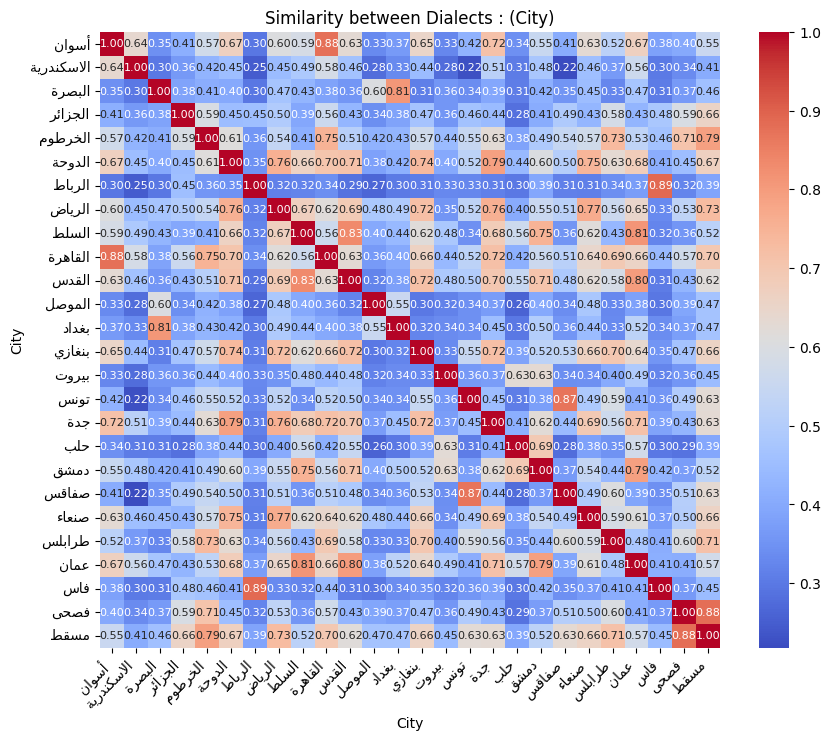

In [ ]:
calc_similarity(data_trian_df,"City",3)

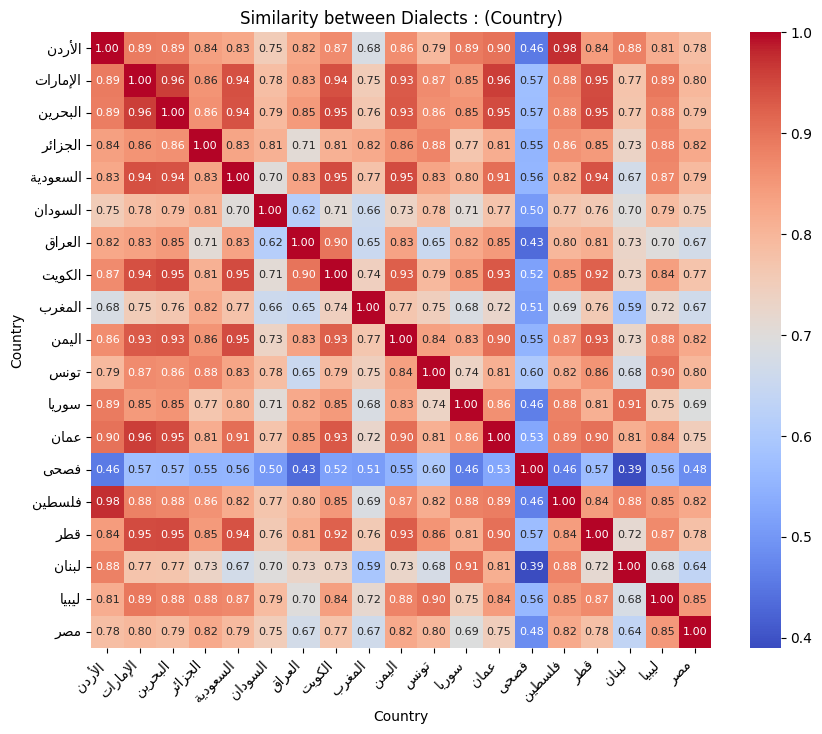

In [ ]:
calc_similarity(data_trian_df,"Country",20)

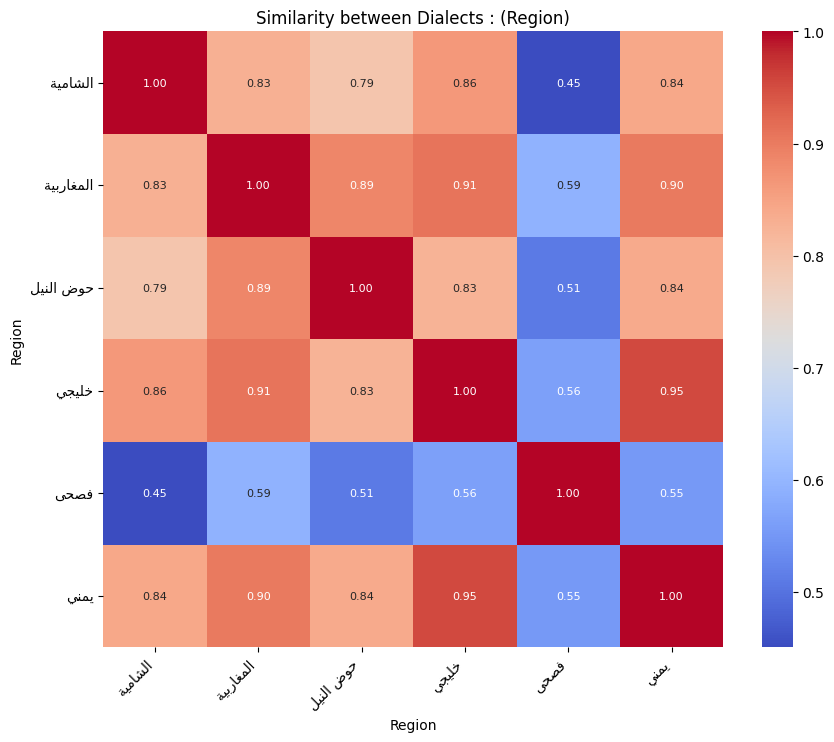

In [ ]:
calc_similarity(data_trian_df,"Region",20)

لاحظنا بشكل عام عند مقارنة اللهجات بين المدن فنجد ان عدد قليل منها فقط متقارب بين بعضها اما عند المناطق البلدان فنجد ان التقارب بين اللهجات اكبر وبالاخص بين المناطق حيث كل منطقة تحتوي العديد من الدول مما ينتج عنه تقارب للهجات بين المناطق , وايضا لاحظنا اللغة العربية الفصحى تظهر تباعدا عن اللهجات الاخرى في جميع المستويات .

## [2.7]

In [ ]:
# !wget https://archive.org/download/arabic_corpus/vectors.txt.xz
# !xz -d vectors.txt.xz

In [ ]:
embeddings_index = {}
with open('vectors.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:pass


train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in embeddings_index:
        oov_words += 1
oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 474341
Total number of unique words in training data: 739865
OOV rate: 64.11%


In [ ]:
import fasttext

model_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz"
model_filename = "cc.ar.300.bin"

import os
if not os.path.exists(model_filename):
    print("Downloading the FastText model...")
    !wget {model_url}
    !gunzip cc.ar.300.bin.gz
    print("Model downloaded successfully.")
else:
  print("Model already exists.")


Model already exists.


In [ ]:
ft_model = fasttext.load_model(model_filename)
train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)
model_vocab = set(ft_model.words)
oov_words = 0
for word in unique_train_words:
    if word not in  model_vocab:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words: {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate: {oov_rate:.2f}%")

Number of OOV words: 466774
Total number of unique words in training data: 739865
OOV rate: 63.09%


In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

In [ ]:
model_aravec = gensim.models.Word2Vec.load("full_uni_cbow_300_twitter.mdl")

train_tokens = [token for tokens_list in data_trian_df['tokens'] for token in tokens_list]
unique_train_words = set(train_tokens)

oov_words = 0
for word in unique_train_words:
    if word not in model_aravec.wv:
        oov_words += 1

oov_rate = (oov_words / len(unique_train_words)) * 100

print(f"Number of OOV words (AraVec): {oov_words}")
print(f"Total number of unique words in training data: {len(unique_train_words)}")
print(f"OOV rate (AraVec): {oov_rate:.2f}%")

Number of OOV words (AraVec): 455129
Total number of unique words in training data: 739865
OOV rate (AraVec): 61.52%


# مهمة 03 : تنظيف وتوحيد النص

normalization and cleaning Text

## [3.1]


In [ ]:
def remove_link(text):
     return re.sub(r'http\S+|www\.\S+', '', text)
def remove_hashtag(text):
     return re.sub(r'#\w+', '', text)
def remove_tag(text):
     return re.sub(r'@\w+', '', text)
def remove_foreign_word(text):
     return re.sub(r'[a-zA-z]+', '', text)
def remove_punctuation(text):
     punctuation = r'[؟،؛!…ء\"ـ\'\(\)\{\}\[\]\|\:\;\<\>\،\.\/\~\-\=\+\*\&\^\$#@\%\`]'
     return re.sub(r"(?<=\w)(" + punctuation + r")|(" + punctuation + r")(?=\w)|(" + punctuation + r")+|(" + punctuation + r")", ' ', text)
def remove_numbers(text):
     return re.sub(r'[0-9\u0660-\u0669]', '', text)
def remove_symbols(text):
     # إزالة جميع الرموز غير النصية (عدا الحروف والمسافات)
     return re.sub(r'[^\w\s\u0600-\u06FF]', '', text)
def remove_diacritics(text):
     # إزالة التشكيل من النص العربي
     return re.sub(r'[\u064B-\u065F\u0670]', '', text)
def remove_repeated_characters(text):
     return re.sub(r'(.)\1+', r'\1', text)
def remove_stop_words(text):
     stop_words = [ 'في', 'من', 'على', 'إلى', 'أن', 'عن', 'كان', 'كانت', 'هو', 'هي', 'هذا', 'هذه', 'ذلك', 'تلك', 'ما', 'ماذا' ]
     pattern = r'\b(' + '|'.join(stop_words) + r')\b'
     return re.sub(pattern, '', text)
def remove_extra_spaces(text):
     return re.sub(r'\s+', ' ', text).strip()

def apply_and_print(df, func,name,column_name):
  df[name] = df[column_name].apply(func)
  return df.head()


تابع ازالة الروابط : بعد تحليل ودراسة الداتا وجدنا انها تحوس كما كبيرا من الروابط في النصو ص ونجد انها لا تساعد في هدف المسالة لذا سنقوم بتطبيق هذا التابع واخبار فائدته لاحقا .
ازالة الهاشتاغ والتاغ : بالاضافة الى الروابط يوجد ايضا العديد من الهاشتاغز والتاغز باللغتين عربية وانكليزية وسنقوم بازالتها لاننا نرى انها قد تسبب ضوضاء في الداتا .
ازالة الكلمات الانكليزية : نجد ان هدفنا هو تحديد لهجة نص عربي لذا سيكون من الافضل ازالة الكلمات من لغات اخرى .
ازالة علامات الترقيم والارقام : يحوي النص على عدد كبير من علامات الترقيم التي قد لا تكون ذات صلة بتحليل النصوص.
ازالة الرموز : نجد انه من الافضل ازالة الرموز المختلفة بالنص لانها تسبب ضوضاء .
ازالة التشكيل : نجد انه من الجيد استخدامه لتبسيط النصوص حيث قد يختلف التشكيل من نص لاخر .
ازالة كلمات التوقف : لا نعرف اذا كانت ازالتها ستساعد في تحسيين نتائج المسالة ولكن قررنا تجربتها لانة كلمات التوقف عادة لا تحمل اي معلومات مفسدة.
اذالة الاحرف المكررة : لتصيح الاخطاء الاملائية وكتابة الاحرف بشكل متكرر .
ازالة المشافات الزائدة : فقط لتنظيف النصوص وتوحيدها


In [ ]:
testing_df=pd.DataFrame(data_trian_df['sent'])

In [ ]:
apply_and_print(testing_df, remove_link,"remove_link", 'sent')
apply_and_print(testing_df, remove_hashtag,"remove_hashtag", 'sent')
apply_and_print(testing_df, remove_tag,"remove_tag", 'sent')
apply_and_print(testing_df, remove_punctuation, "remove_punctuation",'sent')
apply_and_print(testing_df, remove_numbers,"remove_numbers", 'sent')
apply_and_print(testing_df, remove_symbols,"remove_symbols", 'sent')
apply_and_print(testing_df, remove_foreign_word,"remove_foreign_word", 'sent')
apply_and_print(testing_df, remove_diacritics, "remove_diacritics",'sent')
apply_and_print(testing_df, remove_repeated_characters,"remove_repeated_characters", 'sent')
apply_and_print(testing_df, remove_stop_words,"remove_stop_words", 'sent')
apply_and_print(testing_df, remove_extra_spaces,"remove_extra_spaces", 'sent')

,sent,remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_numbers,remove_symbols,remove_foreign_word,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces
0,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك قدام مكتب معلومات السياح بالزبط,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.,موجود هنيك، قدام مكتب معلومات السياح بالزبط.
1,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل.,ما سمعت بهيك عنوان هون من قبل.,سمعت بهيك عنوان هون قبل.,ما سمعت بهيك عنوان هون من قبل.
2,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.,إمشي مباشرة لحد تشوف صيدلية.,إمشي مباشرة لحد ما تشوف صيدلية.
3,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟,بأديش الفطور؟
4,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟,كيف فيني ساعدك؟


## [3.2]

In [ ]:
def normaliz_and_clean(text,func_list):
    for func in func_list:
        text=func(text)
    return text

## [3.3]

In [ ]:
func_list=[remove_link,remove_hashtag,remove_tag,remove_punctuation,remove_symbols,remove_foreign_word,remove_numbers,remove_diacritics,remove_repeated_characters,remove_stop_words,remove_extra_spaces]
data_trian_df["normalize_sent"]=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
data_trian_df.head(10)

,split,sent,Region,Country,City,tokens,normalize_sent
3,corpus-6-test-corpus-26-train,هناك ، أمام بيانات السائح تماما .,فصحى,فصحى,فصحى,"[هناك, ،, أمام, بيانات, السائح, تماما, .]",هناك أمام بيانات السائح تماما
4,corpus-6-test-corpus-26-train,لم اسمع بهذا العنوان من قبل بالقرب من هنا .,فصحى,فصحى,فصحى,"[لم, اسمع, بهذا, العنوان, من, قبل, بالقرب, من,...",لم اسمع بهذا العنوان قبل بالقرب هنا
5,corpus-6-test-corpus-26-train,استمر في السير في هذا الطريق حتى تجد صيدلية .,فصحى,فصحى,فصحى,"[استمر, في, السير, في, هذا, الطريق, حتى, تجد, ...",استمر السير الطريق حتى تجد صيدلية
14,corpus-6-test-corpus-26-train,كم تكلفة الإفطار ؟,فصحى,فصحى,فصحى,"[كم, تكلفة, الإفطار, ؟]",كم تكلفة الإفطار
15,corpus-6-test-corpus-26-train,كيف أستطيع مساعدتك ؟,فصحى,فصحى,فصحى,"[كيف, أستطيع, مساعدتك, ؟]",كيف أستطيع مساعدتك
17,corpus-6-test-corpus-26-train,اتجه يسارا عند الناصية الثالثة .,فصحى,فصحى,فصحى,"[اتجه, يسارا, عند, الناصية, الثالثة, .]",اتجه يسارا عند الناصية الثالثة
24,corpus-6-test-corpus-26-train,هل تحب أن تضع قشدة وسكر في قهوتك ؟,فصحى,فصحى,فصحى,"[هل, تحب, أن, تضع, قشدة, وسكر, في, قهوتك, ؟]",هل تحب تضع قشدة وسكر قهوتك
32,corpus-6-test-corpus-26-train,هل يمكنكم صرف الشيك ذو المائتي دولار الخاص بي ؟,فصحى,فصحى,فصحى,"[هل, يمكنكم, صرف, الشيك, ذو, المائتي, دولار, ا...",هل يمكنكم صرف الشيك ذو المائتي دولار الخاص بي
36,corpus-6-test-corpus-26-train,إذا حدث ذلك ، من فضلك أتصل بي .,فصحى,فصحى,فصحى,"[إذا, حدث, ذلك, ،, من, فضلك, أتصل, بي, .]",إذا حدث فضلك أتصل بي
41,corpus-6-test-corpus-26-train,أين المقهى ؟,فصحى,فصحى,فصحى,"[أين, المقهى, ؟]",أين المقهى


In [ ]:
d= data_trian_df['normalize_sent'].apply(tokenize)
tokens = [token for tokens_list in d for token in tokens_list]
total_tokens_normalize = len(tokens)
unique_tokens_normalize = len(set(tokens))
print(f"nomber of total tokens  (before) : {total_tokens} , (after) : {total_tokens_normalize}")
print(f"nomber of unique tokens  (before) : {unique_tokens} , (after) : {unique_tokens_normalize}")

nomber of total tokens  (before) : 8466370 , (after) : 5908395
nomber of unique tokens  (before) : 739865 , (after) : 450276


## [3.4]

In [ ]:
short_or_empty_rows = data_trian_df[data_trian_df['normalize_sent'].str.len() < 5]
num_short_or_empty = len(short_or_empty_rows)
print(f"\nعدد الأسطر التي أصبحت فارغة أو مكونة من أقل من 5 محارف: {num_short_or_empty}")
# short_or_empty_rows
df = data_trian_df[data_trian_df['normalize_sent'].str.len() >= 5]
print(f"\nتم حذف {num_short_or_empty} أسطر.")



عدد الأسطر التي أصبحت فارغة أو مكونة من أقل من 5 محارف: 1459

تم حذف 1459 أسطر.


# مهمة 04  : بناء النموذج المرجعي

Model Baseline

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []
comparison_table['f_score'] = []

In [ ]:
def add_to_comparison_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy,f_score):
  comparison_table['question_step_number'].append(question_step_number)
  comparison_table['model_name'].append(model_name)
  comparison_table['features'].append(features)
  comparison_table['model_parameters'].append(model_parameters)
  comparison_table['preprocessing_methods'].append(preprocessing_methods)
  comparison_table['accuracy'].append(accuracy)
  comparison_table['balance_accuracy'].append(balance_accuracy)
  comparison_table['f_score'].append(f_score)


In [ ]:
final_table = {}

final_table['question_step_number'] = []
final_table['model_name'] = []
final_table['features'] = []
final_table['model_parameters'] = []
final_table['preprocessing_methods'] = []
final_table['accuracy'] = []
final_table['balance_accuracy'] = []
final_table['f_score'] = []

In [ ]:
def add_to_final_table(question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balanced_accuracy,f_score):
  final_table['question_step_number'].append(question_step_number)
  final_table['model_name'].append(model_name)
  final_table['features'].append(features)
  final_table['model_parameters'].append(model_parameters)
  final_table['preprocessing_methods'].append(preprocessing_methods)
  final_table['accuracy'].append(accuracy)
  final_table['balance_accuracy'].append(balanced_accuracy)
  final_table['f_score'].append(f_score)


## [4.1]


In [ ]:
X_trian=data_trian_df["sent"].to_list()
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"].to_list()
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"].to_list()
Y_valid=data_vaild_df["Country"].to_list()

## [4.2]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)


MultinomialNB()

## [4.3]

In [ ]:
def test_naive_bayes ( X_test_tfidf, Y_test):

    Y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(Y_test, Y_pred)
    balanced_accuracy=balanced_accuracy_score(Y_test, Y_pred)
    f_score = f1_score(Y_test, Y_pred, average='weighted')
    report = classification_report(Y_test, Y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Balanced_accuracy: {balanced_accuracy}")
    print(f"f_score: {f_score}")
    return accuracy,balanced_accuracy,f_score,report



In [ ]:
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)

Accuracy: 0.47986742824906564
Balanced_accuracy: 0.40941325530471107
f_score: 0.4444424386607807


In [ ]:
add_to_final_table("4.3",'MultinomialNB','TF-IDF','default',"None",accuracy,balanced_accuracy,f_score)

## [4.4]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"none",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5636908269495188
Balanced_accuracy: 0.42621063174666496
f_score: 0.536973524765503


In [ ]:
func_list=[remove_link]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove links",accuracy,balanced_accuracy,f_score)


Accuracy: 0.5668336279709291
Balanced_accuracy: 0.43016382352147436
f_score: 0.540485199208115


In [ ]:
func_list=[remove_hashtag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove hashtag",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5615301512472991
Balanced_accuracy: 0.4234024519473897
f_score: 0.5345199316958934


In [ ]:
func_list=[remove_tag]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove tag",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5198880377136122
Balanced_accuracy: 0.3725937196923222
f_score: 0.48434655608548344


In [ ]:
func_list=[remove_punctuation]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove punctuation",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5611864073855825
Balanced_accuracy: 0.42326864579193857
f_score: 0.5340168296644985


In [ ]:
func_list=[remove_symbols]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove symbols",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5632979768218425
Balanced_accuracy: 0.42606229815236357
f_score: 0.5367656486498095


In [ ]:
func_list=[remove_repeated_characters]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove repeated_characters",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5426733451188371
Balanced_accuracy: 0.40184822009883586
f_score: 0.513523542383397


In [ ]:
func_list=[remove_numbers]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove numbers",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5434099391082302
Balanced_accuracy: 0.3998575862467977
f_score: 0.5120065345630754


In [ ]:
func_list=[remove_extra_spaces]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove extra spaces",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5636908269495188
Balanced_accuracy: 0.42621063174666496
f_score: 0.536973524765503


In [ ]:
func_list=[remove_foreign_word]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove foreign word",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5201335690434099
Balanced_accuracy: 0.3727266776407516
f_score: 0.48398190709938543


In [ ]:
func_list=[remove_stop_words]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove stop words",accuracy,balanced_accuracy,f_score)

Accuracy: 0.563347083087802
Balanced_accuracy: 0.42638556920352366
f_score: 0.5363736704942872


In [ ]:
func_list=[remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)

clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.4",'MultinomialNB','TF-IDF','default',"remove diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5639363582793164
Balanced_accuracy: 0.4265222140370688
f_score: 0.5372271161684239


## [4.5]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_final_table("4.5",'MultinomialNB','TF-IDF','default',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.48423947535434736
Balanced_accuracy: 0.41464413675538403
f_score: 0.4497678994751341


## [4.6]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.6)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.6',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5667845217049695
Balanced_accuracy: 0.43011558164191493
f_score: 0.5404563119083402


In [ ]:
vectorizer = TfidfVectorizer(min_df=0.06)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.06',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.14240817128265568
Balanced_accuracy: 0.0611224072750778
f_score: 0.049752315168016086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
vectorizer = TfidfVectorizer(min_df=0.01)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','min_df=0.01',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.2125319190728737
Balanced_accuracy: 0.12228237352142772
f_score: 0.15547241593811278


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,2)',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5245531329797682
Balanced_accuracy: 0.3802246123546281
f_score: 0.4965397040541023


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','ngram_range=(1,3)',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5082498526812022
Balanced_accuracy: 0.3620551954987058
f_score: 0.4799671268998038


In [ ]:
vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=20000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6120113926537026
Balanced_accuracy: 0.5042670092271725
f_score: 0.5941547716684363


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6430465527401297
Balanced_accuracy: 0.5324907435479515
f_score: 0.6255137501508511


In [ ]:
vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_features=100000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6392162639952857
Balanced_accuracy: 0.5216595412711843
f_score: 0.6195221201506486


In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8,max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB()
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','max_df=0.8,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6430465527401297
Balanced_accuracy: 0.5324907435479515
f_score: 0.6255137501508511


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.05)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.05,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6625417403260656
Balanced_accuracy: 0.5753572470696363
f_score: 0.651377331290809


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.1,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6646533097623257
Balanced_accuracy: 0.5769166171704649
f_score: 0.6531776866788266


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_valid_tfidf = vectorizer.transform(X_valid)
clf = MultinomialNB(alpha=0.5)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_valid_tfidf,Y_valid)
add_to_comparison_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.6591043017088981
Balanced_accuracy: 0.5602961493008747
f_score: 0.6450096632990711


In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_tfidf, Y_trian)
accuracy,balanced_accuracy,f_score,report=test_naive_bayes (X_test_tfidf,Y_test)
add_to_final_table("4.6",'MultinomialNB','TF-IDF','alpha=0.5,max_features=50000',"remove_link,remove_diacritics",accuracy,balanced_accuracy,f_score)

Accuracy: 0.5939637543191595
Balanced_accuracy: 0.5665902806124556
f_score: 0.5836903707552502


# مهمة 05 : التدريب باستخدام نماذج التعلم العميق

Deep learning

The Comparison Dictionary example

In [ ]:
# comparison_table = {}

# comparison_table['question_step_number'] = []
# comparison_table['model_name'] = []
# comparison_table['features'] = []
# comparison_table['model_parameters'] = []
# comparison_table['preprocessing_methods'] = []
# comparison_table['accuracy'] = []
# comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

In [ ]:
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)  # TPU strategy
    print("TPU detected and initialized.")
except ValueError:  # No TPU found, use default strategy
    strategy = tf.distribute.get_strategy()  # Default strategy
    print("No TPU detected, using default strategy.")

TPU detected and initialized.


## [5.1]

In [ ]:
def test_model(model,X_test_tfidf,Y_test_encoded):
  loss, accuracy = model.evaluate(X_test_tfidf, Y_test_encoded)
  Y_pred = model.predict(X_test_tfidf)
  Y_pred_labels = np.argmax(Y_pred, axis=1)  # Get predicted labels
  balanced_accuracy = balanced_accuracy_score(Y_test_encoded, Y_pred_labels)
  f1 = f1_score(Y_test_encoded, Y_pred_labels, average='weighted')
  print(f"Test Loss: {loss}")
  print(f"Test Accuracy: {accuracy}")
  print(f"Balanced Accuracy: {balanced_accuracy}")
  print(f"F1-score (weighted): {f1}")
  return loss, accuracy,balanced_accuracy,f1

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Country"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Country"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Country"].to_list()


In [ ]:
len(X_trian)

535652

In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer.fit_transform(X_trian)
X_test_tfidf = vectorizer.transform(X_test)
X_valid_tfidf = vectorizer.transform(X_valid)

In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [49]:
# input_dim = X_train_tfidf.shape[1]
# num_classes = len(set(Y_trian))
# k.clear_session()
# model = models.Sequential()
# model.add(Input(shape=(input_dim,),sparse=True))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # For multi-class classification
#               metrics=['accuracy'])
# model.summary()
# model.fit(X_train_tfidf_reordered, Y_trian_encoded, epochs=10, batch_size=64, validation_data=(X_valid_tfidf_reordered, Y_valid_encoded),verbose=True)
# loss, accuracy,balanced_accuracy,f1=test_model(model,X_test_tfidf,Y_test_encoded)

In [ ]:
input_dim = X_train_tfidf.shape[1]
num_classes = len(set(Y_trian))

model = models.Sequential()
model.add(Input(shape=(input_dim,),sparse=True))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])
model.summary()
model.fit(X_train_tfidf, Y_trian_encoded, epochs=10, batch_size=64, validation_data=(X_valid_tfidf, Y_valid_encoded),verbose=True)
loss, accuracy,balanced_accuracy,f1=test_model(model,X_valid_tfidf,Y_valid_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       6,400,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,409,619 (24.45 MB)

 Trainable params: 6,409,619 (24.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 548s 65ms/step - accuracy: 0.3973 - loss: 2.0047 - val_accuracy: 0.6529 - val_loss: 1.1897
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 545s 63ms/step - accuracy: 0.6185 - loss: 1.2905 - val_accuracy: 0.6666 - val_loss: 1.1354
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 534s 64ms/step - accuracy: 0.6600 - loss: 1.1483 - val_accuracy: 0.6710 - val_loss: 1.1171
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 579s 66ms/step - accuracy: 0.6844 - loss: 1.0608 - val_accuracy: 0.6709 - val_loss: 1.1139
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 546s 64ms/step - accuracy: 0.7009 - loss: 1.0040 - val_accuracy: 0.6709 - val_loss: 1.1147
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 557s 63ms/step - accuracy: 0.7137 - loss: 0.9565 - val_accuracy: 0.6739 - val_loss: 1.1216
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 597s 67ms/step - accuracy: 0.7243 - loss: 0.9187 - val_accuracy: 0.6707 - val_loss: 1.1356
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 608s 66ms/step - accuracy: 

## [5.2]

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

### [5.2.1]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # حجم المفردات
embedding_dim = 300  # بعد التضمين
k.clear_session()
model1 = Sequential()
model1.add(Input(shape=(max_len,)))
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim , trainable=True))
model1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(len(label_encoder.classes_), activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()
history = model1.fit(X_train_padded, Y_trian_encoded,
                    validation_data=(X_valid_padded, Y_valid_encoded),
                    epochs=10, batch_size=64)
loss, accuracy,balanced_accuracy,f1=test_model(model1,X_test_padded,Y_test_encoded)
model1.save('text_cnn_model.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 215,617,819 (822.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 215416200 elements. This may consume a large amount of memory.
  warnings.warn(


8370/8370 ━━━━━━━━━━━━━━━━━━━━ 447s 53ms/step - accuracy: 0.4366 - loss: 1.8698 - val_accuracy: 0.6492 - val_loss: 1.1640
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 478s 50ms/step - accuracy: 0.6561 - loss: 1.1513 - val_accuracy: 0.6606 - val_loss: 1.1249
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 446s 51ms/step - accuracy: 0.7152 - loss: 0.9348 - val_accuracy: 0.6606 - val_loss: 1.1612
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 424s 51ms/step - accuracy: 0.7687 - loss: 0.7484 - val_accuracy: 0.6529 - val_loss: 1.2530
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 442s 51ms/step - accuracy: 0.8124 - loss: 0.6023 - val_accuracy: 0.6428 - val_loss: 1.3898
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 445s 51ms/step - accuracy: 0.8458 - loss: 0.4926 - val_accuracy: 0.6419 - val_loss: 1.5194
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 442s 51ms/step - accuracy: 0.8695 - loss: 0.4157 - val_accuracy: 0.6377 - val_loss: 1.7185
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 442s 51ms/step - accuracy: 0.8886 - lo

Test Loss: 2.588724374771118
Test Accuracy: 0.574501097202301
Balanced Accuracy: 0.5620892468587272
F1-score (weighted): 0.5719670787925616


### [5.2.2]

In [ ]:
# !wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_uni_cbow_300_twitter.zip
# !unzip full_uni_cbow_300_twitter.zip

# Load the pre-trained word embeddings
model_path = "full_uni_cbow_300_twitter.mdl" # Update if your model has a different name
try:
  word_vectors = gensim.models.Word2Vec.load(model_path)
  print("Pre-trained word embeddings loaded successfully.")
except Exception as e:
  print(f"Error loading pre-trained embeddings: {e}")
  # Handle the error appropriately, e.g., exit or use a different model

Pre-trained word embeddings loaded successfully.


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Size of vocabulary
embedding_dim = 300  # Dimension of pre-trained embeddings

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word_vectors.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        # Word not found in the pre-trained embeddings
        pass

k.clear_session()
model2 = Sequential()
model2.add(Input(shape=(max_len,)))
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)) # Use pre-trained embeddings and freeze the layer
model2.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history = model2.fit(X_train_padded, Y_trian_encoded,
                      validation_data=(X_valid_padded, Y_valid_encoded),
                      epochs=10, batch_size=64)

loss, accuracy, balanced_accuracy, f1 = test_model(model2, X_test_padded, Y_test_encoded)
model2.save('text_cnn_model_with_pretrained_embeddings.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 201,619 (787.57 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.2704 - loss: 2.3380 - val_accuracy: 0.4691 - val_loss: 1.7210
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.3728 - loss: 1.9940 - val_accuracy: 0.4842 - val_loss: 1.6705
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.3966 - loss: 1.9227 - val_accuracy: 0.4936 - val_loss: 1.6344
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4113 - loss: 1.8743 - val_accuracy: 0.5047 - val_loss: 1.6104
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4228 - loss: 1.8443 - val_accuracy: 0.5050 - val_loss: 1.6021
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.4293 - loss: 1.8189 - val_accuracy: 0.5037 - val_loss: 1.6007
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.4360 - loss: 1.7957 - val_accuracy: 0.5102 - val_loss: 1.6041
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.4425 - loss: 1

### [5.2.3]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Size of vocabulary
embedding_dim = 300  # Dimension of pre-trained embeddings

  # Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word_vectors.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
          # Word not found in the pre-trained embeddings
        pass

k.clear_session()
model3 = Sequential()
model3.add(Input(shape=(max_len,)))
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=True))
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(len(label_encoder.classes_), activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

history = model3.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)

loss, accuracy, balanced_accuracy, f1 = test_model(model3, X_test_padded, Y_test_encoded)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 215,617,819 (822.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 215416200 elements. This may consume a large amount of memory.
  warnings.warn(


8370/8370 ━━━━━━━━━━━━━━━━━━━━ 430s 51ms/step - accuracy: 0.3044 - loss: 2.2430 - val_accuracy: 0.5559 - val_loss: 1.4305
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 437s 51ms/step - accuracy: 0.5040 - loss: 1.5852 - val_accuracy: 0.6191 - val_loss: 1.2443
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 446s 51ms/step - accuracy: 0.5990 - loss: 1.3192 - val_accuracy: 0.6435 - val_loss: 1.1688
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 458s 53ms/step - accuracy: 0.6378 - loss: 1.1918 - val_accuracy: 0.6524 - val_loss: 1.1627
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 447s 53ms/step - accuracy: 0.6606 - loss: 1.1074 - val_accuracy: 0.6552 - val_loss: 1.1712
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 496s 53ms/step - accuracy: 0.6809 - loss: 1.0352 - val_accuracy: 0.6481 - val_loss: 1.2276
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 444s 53ms/step - accuracy: 0.7000 - loss: 0.9634 - val_accuracy: 0.6469 - val_loss: 1.2699
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 438s 52ms/step - accuracy: 0.7197 - lo

In [ ]:
embedding_layer2 = model3.layers[0]
embeddings2 = embedding_layer2.get_weights()[0]
np.save('updated_word_embeddings2.npy', embeddings2)

## [5.3]

In [ ]:
import numpy as np
embeddings = np.load('updated_word_embeddings2.npy')


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 64)              │          96,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,517,659 (822.13 MB)

 Trainable params: 101,459 (396.32 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.5450 - loss: 1.5114 - val_accuracy: 0.6435 - val_loss: 1.2318
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.6828 - loss: 1.0426 - val_accuracy: 0.6417 - val_loss: 1.2495
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7014 - loss: 0.9723 - val_accuracy: 0.6401 - val_loss: 1.3150
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7125 - loss: 0.9282 - val_accuracy: 0.6382 - val_loss: 1.3034
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7234 - loss: 0.8892 - val_accuracy: 0.6374 - val_loss: 1.3651
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.7286 - loss: 0.8668 - val_accuracy: 0.6369 - val_loss: 1.3913
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.7333 - loss: 0.8503 - val_accuracy: 0.6333 - val_loss: 1.4102
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7357 - loss: 0

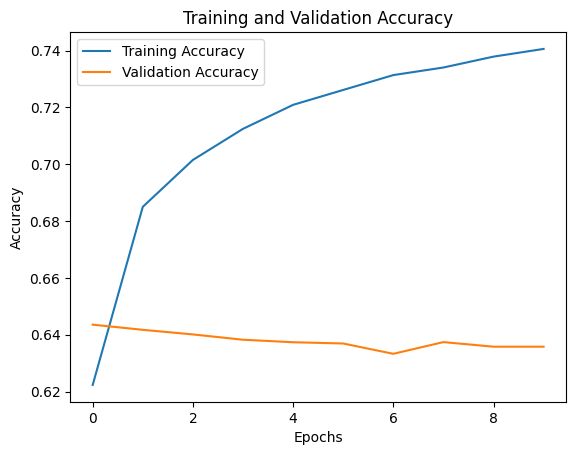

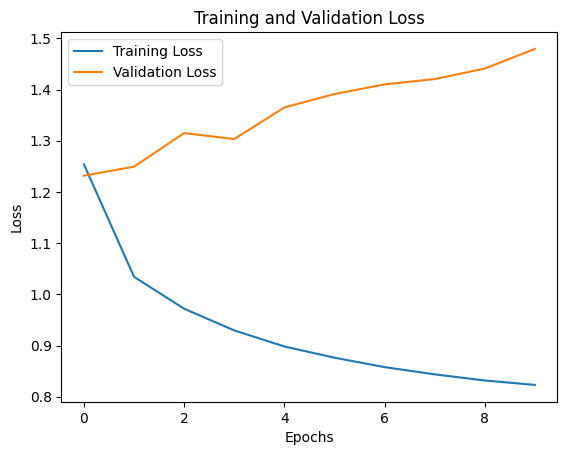

In [ ]:
k.clear_session()
model_1 = Sequential()
model_1.add(Input(shape=(max_len,)))
model_1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_1.add(GlobalMaxPooling1D())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

history = model_1.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_1, X_valid_padded, Y_valid_encoded)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 94, 128)             │         268,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,694,619 (822.81 MB)

 Trainable params: 278,419 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.5393 - loss: 1.5215 - val_accuracy: 0.6424 - val_loss: 1.2263
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.6789 - loss: 1.0523 - val_accuracy: 0.6466 - val_loss: 1.2669
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.7026 - loss: 0.9695 - val_accuracy: 0.6496 - val_loss: 1.2965
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 61s 6ms/step - accuracy: 0.7142 - loss: 0.9200 - val_accuracy: 0.6419 - val_loss: 1.3317
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7254 - loss: 0.8779 - val_accuracy: 0.6413 - val_loss: 1.3809
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7330 - loss: 0.8497 - val_accuracy: 0.6390 - val_loss: 1.3947
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7395 - loss: 0.8261 - val_accuracy: 0.6405 - val_loss: 1.4596
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7464 - loss: 0

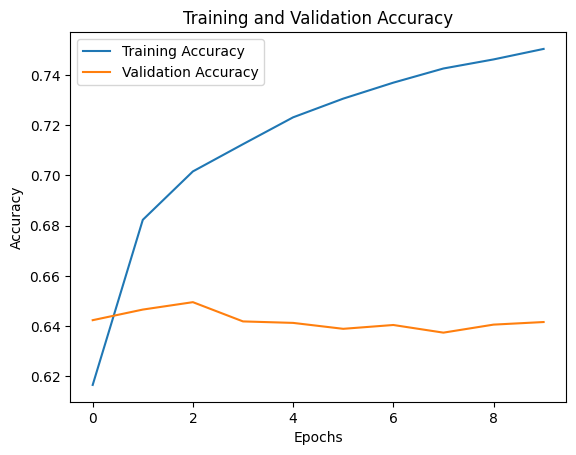

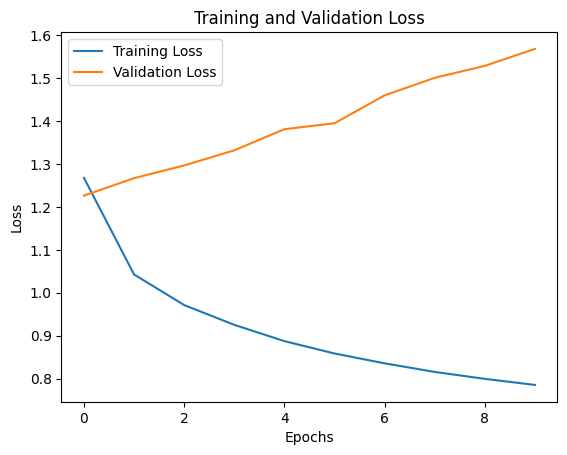

In [ ]:
k.clear_session()
model_2 = Sequential()
model_2.add(Input(shape=(max_len,)))
model_2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_2.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

history = model_2.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_2, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,617,819 (822.52 MB)

 Trainable params: 201,619 (787.57 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.5361 - loss: 1.5223 - val_accuracy: 0.6399 - val_loss: 1.2352
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.6824 - loss: 1.0414 - val_accuracy: 0.6437 - val_loss: 1.2613
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7080 - loss: 0.9469 - val_accuracy: 0.6442 - val_loss: 1.2862
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7247 - loss: 0.8862 - val_accuracy: 0.6412 - val_loss: 1.3457
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7356 - loss: 0.8460 - val_accuracy: 0.6406 - val_loss: 1.4344
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7443 - loss: 0.8117 - val_accuracy: 0.6407 - val_loss: 1.4386
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7504 - loss: 0.7910 - val_accuracy: 0.6377 - val_loss: 1.4997
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7523 - loss: 0

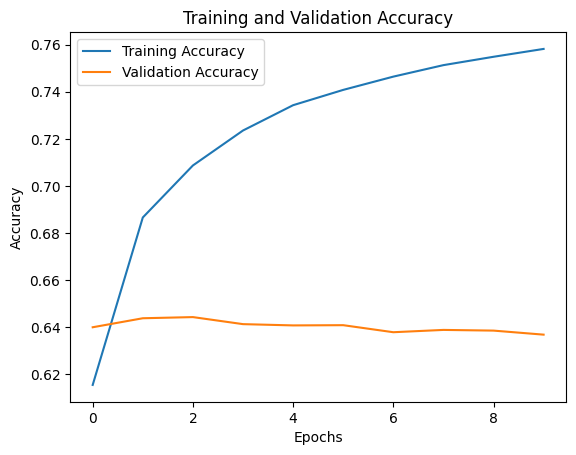

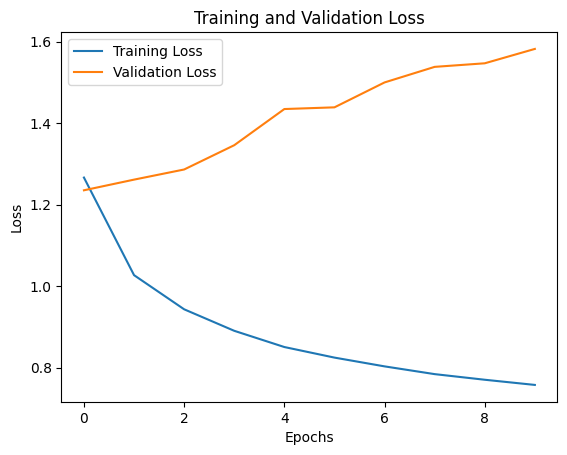

In [ ]:
k.clear_session()
model_3 = Sequential()
model_3.add(Input(shape=(max_len,)))
model_3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

history = model_3.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_3, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 94, 64)              │         134,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,556,059 (822.28 MB)

 Trainable params: 139,859 (546.32 KB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.5414 - loss: 1.5220 - val_accuracy: 0.6444 - val_loss: 1.2178
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.6754 - loss: 1.0707 - val_accuracy: 0.6440 - val_loss: 1.2490
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.6957 - loss: 0.9920 - val_accuracy: 0.6381 - val_loss: 1.2833
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7068 - loss: 0.9489 - val_accuracy: 0.6402 - val_loss: 1.2946
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7142 - loss: 0.9192 - val_accuracy: 0.6396 - val_loss: 1.3324
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7215 - loss: 0.8941 - val_accuracy: 0.6352 - val_loss: 1.3677
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7267 - loss: 0.8723 - val_accuracy: 0.6390 - val_loss: 1.3800
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7293 - loss: 0

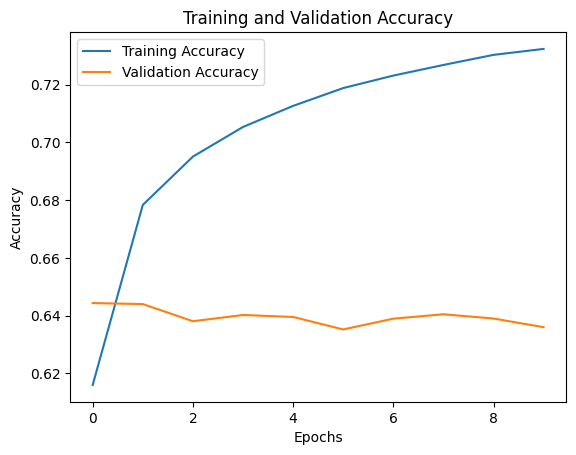

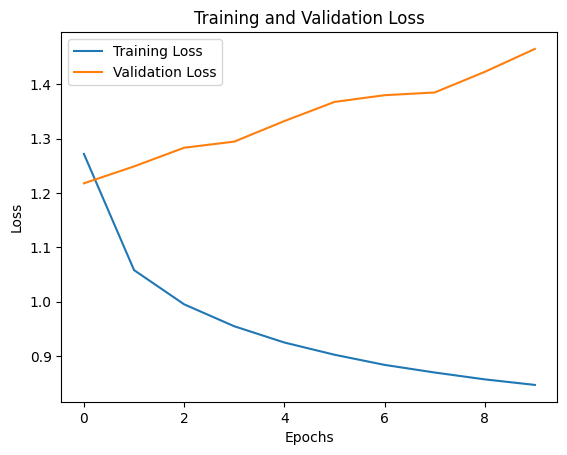

In [ ]:
k.clear_session()
model_4 = Sequential()
model_4.add(Input(shape=(max_len,)))
model_4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_4.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model_4.add(GlobalMaxPooling1D())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

history = model_4.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_4, X_valid_padded, Y_valid_encoded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


لاحظنا وجود overfitting في جميع النماذج لذا اخترنا النموزج ذي ال acc الاعلى.

## [5.4]

In [ ]:
k.clear_session()
model_2 = Sequential()
model_2.add(Input(shape=(max_len,)))
model_2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_2.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

history = model_2.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_2, X_test_padded, Y_test_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 94, 128)             │         268,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,694,619 (822.81 MB)

 Trainable params: 278,419 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.5296 - loss: 1.5518 - val_accuracy: 0.6440 - val_loss: 1.2152
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.6761 - loss: 1.0638 - val_accuracy: 0.6472 - val_loss: 1.2400
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.6980 - loss: 0.9829 - val_accuracy: 0.6480 - val_loss: 1.2738
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7123 - loss: 0.9285 - val_accuracy: 0.6460 - val_loss: 1.2980
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7241 - loss: 0.8851 - val_accuracy: 0.6431 - val_loss: 1.3708
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.7319 - loss: 0.8565 - val_accuracy: 0.6411 - val_loss: 1.4212
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.7388 - loss: 0.8288 - val_accuracy: 0.6431 - val_loss: 1.4479
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7436 - loss: 0

444/444 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


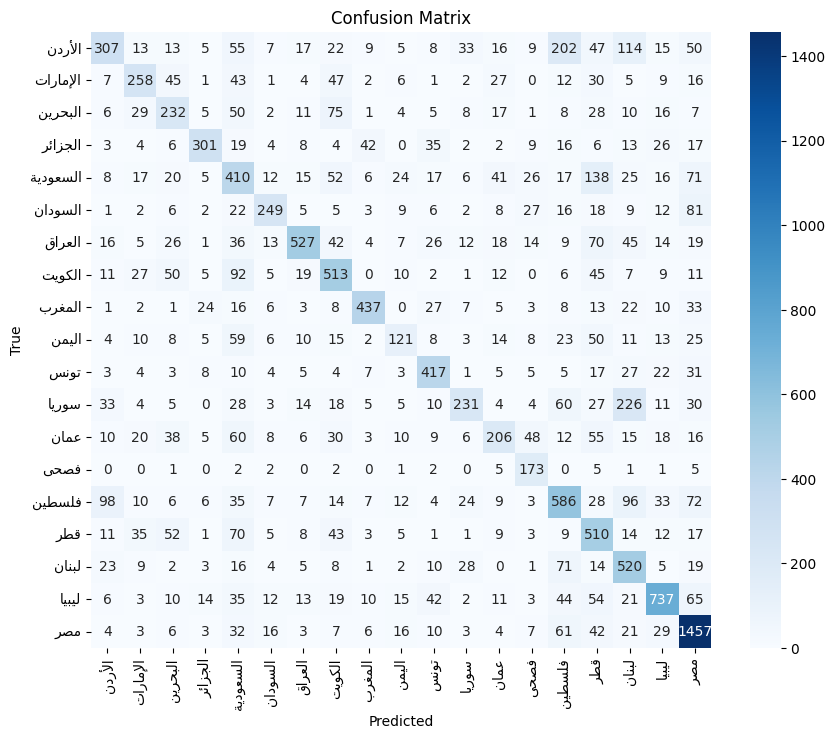

In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = model_2.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

نلاحظ ان النموزج حقق افضل النتائج عند التنبؤ باللجة المصرية بينما سقوم بالخلط بين اللهجة السوؤسة واللبنانية.

## [5.5]

عند مقارنة نتائج تحليل التقارب بين اللهجات مع مصفوفة التعرض وجدنا ان اغلب اللهجات التي تظهر تقارب فيما بينها يميل النموزج للخلط فيما بينها .

## [5.6]

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["City"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["City"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["City"].to_list()


In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

In [ ]:
k.clear_session()
model_22 = Sequential()
model_22.add(Input(shape=(max_len,)))
model_22.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_22.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_22.add(GlobalMaxPooling1D())
model_22.add(Dense(64, activation='relu'))
model_22.add(Dropout(0.5))
model_22.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_22.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_22.summary()

history = model_22.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_22, X_test_padded, Y_test_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 94, 128)             │         268,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,695,139 (822.81 MB)

 Trainable params: 278,939 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8785 - loss: 0.4972 - val_accuracy: 0.7245 - val_loss: 0.9858
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9057 - loss: 0.3358 - val_accuracy: 0.7259 - val_loss: 1.0184
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9132 - loss: 0.3010 - val_accuracy: 0.7348 - val_loss: 1.0044
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9159 - loss: 0.2843 - val_accuracy: 0.7386 - val_loss: 1.0739
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9193 - loss: 0.2707 - val_accuracy: 0.7406 - val_loss: 1.0649
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9216 - loss: 0.2603 - val_accuracy: 0.7418 - val_loss: 1.0986
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9235 - loss: 0.2532 - val_accuracy: 0.7435 - val_loss: 1.1596
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9250 - loss: 0

444/444 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


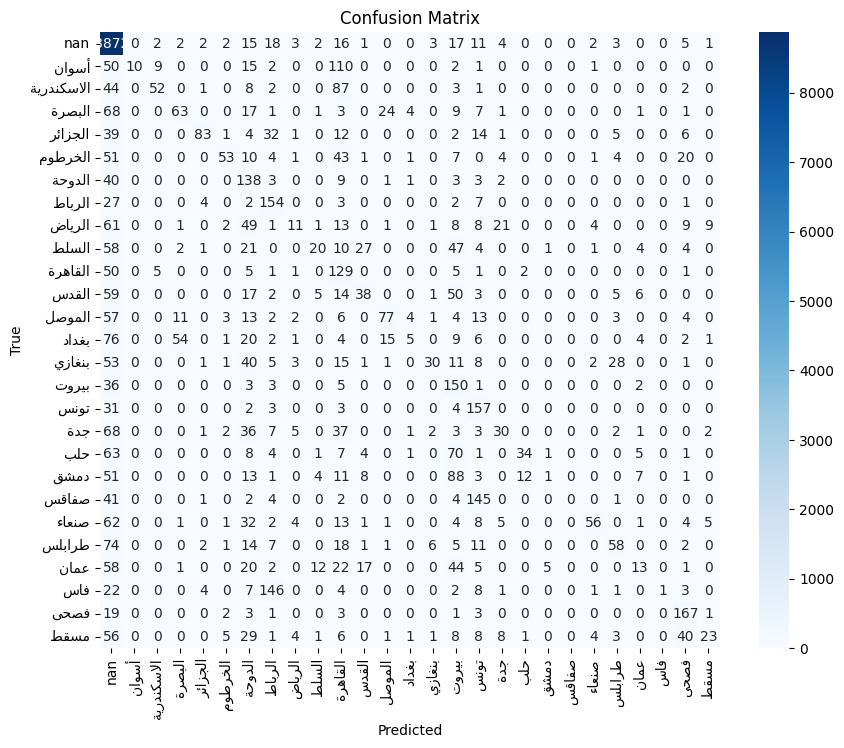

In [ ]:
Y_pred = model_22.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
func_list=[remove_link,remove_diacritics]
X_trian=data_trian_df["sent"].apply(lambda x: normaliz_and_clean(x, func_list))
Y_trian=data_trian_df["Region"].to_list()
X_test=data_test_df["sent"]
Y_test=data_test_df["Region"].to_list()
X_valid=data_vaild_df["sent"]
Y_valid=data_vaild_df["Region"].to_list()


In [ ]:
label_encoder = LabelEncoder()
Y_trian_encoded = label_encoder.fit_transform(Y_trian)
Y_valid_encoded = label_encoder.transform(Y_valid)
Y_test_encoded = label_encoder.transform(Y_test)

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_trian)
X_train_sequences = tokenizer.texts_to_sequences(X_trian)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
max_len = 100

X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=max_len)
X_valid_padded = pad_sequences(X_valid_sequences, padding='post', maxlen=max_len)

In [ ]:
k.clear_session()
model_21 = Sequential()
model_21.add(Input(shape=(max_len,)))
model_21.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embeddings], trainable=False))
model_21.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model_21.add(GlobalMaxPooling1D())
model_21.add(Dense(64, activation='relu'))
model_21.add(Dropout(0.5))
model_21.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_21.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_21.summary()

history = model_21.fit(X_train_padded, Y_trian_encoded,
                     validation_data=(X_valid_padded, Y_valid_encoded),
                     epochs=10, batch_size=64)
loss, accuracy, balanced_accuracy, f1 = test_model(model_21, X_test_padded, Y_test_encoded)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 300)            │     215,416,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 94, 128)             │         268,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,693,774 (822.81 MB)

 Trainable params: 277,574 (1.06 MB)

 Non-trainable params: 215,416,200 (821.75 MB)

Epoch 1/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8001 - loss: 0.6059 - val_accuracy: 0.8076 - val_loss: 0.5498
Epoch 2/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8602 - loss: 0.4176 - val_accuracy: 0.8095 - val_loss: 0.5488
Epoch 3/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8722 - loss: 0.3774 - val_accuracy: 0.8100 - val_loss: 0.5757
Epoch 4/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8801 - loss: 0.3496 - val_accuracy: 0.8082 - val_loss: 0.5988
Epoch 5/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8859 - loss: 0.3292 - val_accuracy: 0.8068 - val_loss: 0.6197
Epoch 6/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8907 - loss: 0.3150 - val_accuracy: 0.8077 - val_loss: 0.6422
Epoch 7/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8943 - loss: 0.3027 - val_accuracy: 0.8089 - val_loss: 0.6689
Epoch 8/10
8370/8370 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8989 - loss: 0

444/444 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


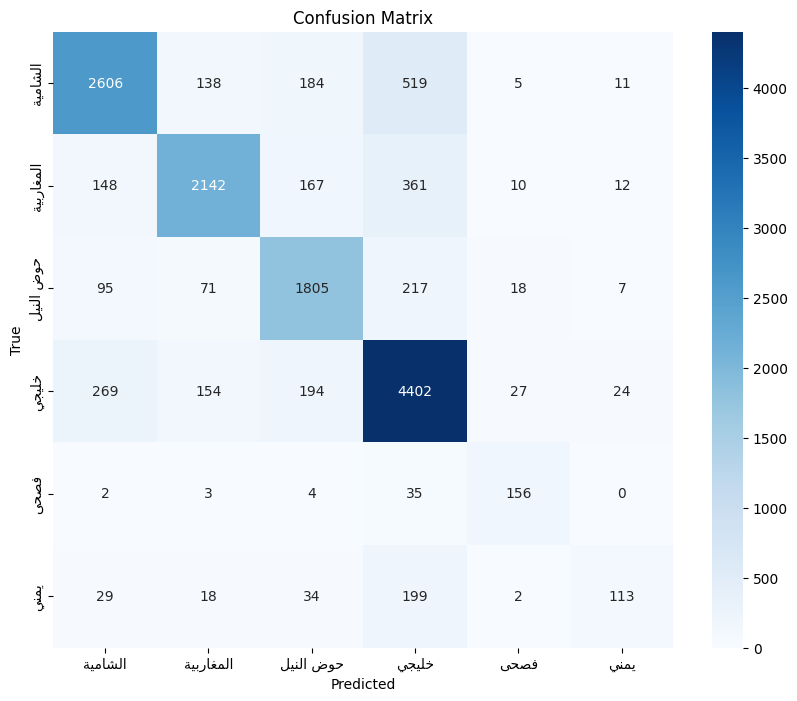

In [ ]:
Y_pred = model_21.predict(X_test_padded)
Y_pred_classes = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test_encoded, Y_pred_classes)
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]
yticklabels = [get_display(arabic_reshaper.reshape(label)) for label in label_encoder.classes_]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xticklabels,
            yticklabels=yticklabels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

هنا ايضا لاحظنا ان الهجات المتقاربة سيقوم النموزج بالخلط بينها بينما اللحات التس تظهر تباعد فاخطاء النموزج تكون قليلا جدا عن التنبؤ بها

# مهمة 06 : التمثيل الداللي

Semantic representation

## [6.1]

## [6.2]

# Final Results

In [56]:
df = pd.DataFrame(comparison_table)
df

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy,f_score
0,4.3,MultinomialNB,TF-IDF,default,None,0.479867,0.409413,0.444442
1,4.4,MultinomialNB,TF-IDF,default,none,0.563691,0.426211,0.536974
2,4.4,MultinomialNB,TF-IDF,default,remove links,0.566834,0.430164,0.540485
3,4.4,MultinomialNB,TF-IDF,default,remove hashtag,0.561530,0.423402,0.534520
4,4.4,MultinomialNB,TF-IDF,default,remove tag,0.519888,0.372594,0.484347
5,4.4,MultinomialNB,TF-IDF,default,remove punctuation,0.561186,0.423269,0.534017
6,4.4,MultinomialNB,TF-IDF,default,remove symbols,0.563298,0.426062,0.536766
7,4.4,MultinomialNB,TF-IDF,default,remove repeated_characters,0.542673,0.401848,0.513524
8,4.4,MultinomialNB,TF-IDF,default,remove numbers,0.543410,0.399858,0.512007
9,4.4,MultinomialNB,TF-IDF,default,remove extra spaces,0.563691,0.426211,0.536974


In [57]:
df1 = pd.DataFrame(final_table)
df1

,question_step_number,model_name,features,model_parameters,preprocessing_methods,accuracy,balance_accuracy,f_score
0,4.6,MultinomialNB,TF-IDF,"alpha=0.5,max_features=50000","remove_link,remove_diacritics",0.593964,0.566590,0.583690
1,5.1,Sequential,TF-IDF,"128,64 units,Dropout 0.5, Adam optimizer,max_f...","remove_link,remove_diacritics",0.671528,0.595162,0.664880
2,5.4,CNN with Fine-tuned Embeddings,Pre-trained Word Embeddings (word2vec),"Embedding dim: 300, 128 filters, kernel size: ...","Tokenization, Padding, Preprocessing methods",0.577674,0.561907,0.573618
3,5.6,CNN with Fine-tuned Embeddings,Pre-trained Word Embeddings (word2vec),"Embedding dim: 300, 128 filters, kernel size: ...","Tokenization, Padding, Preprocessing methods",0.735139,0.324180,0.691373
4,5.6,CNN with Fine-tuned Embeddings,Pre-trained Word Embeddings (word2vec),"Embedding dim: 300, 128 filters, kernel size: ...","Tokenization, Padding, Preprocessing methods",0.791482,0.709451,0.787914


In [59]:
df1.to_csv("[إنجي غبيس-دانا كلش].csv", index=False)